In [1]:
# Settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import uproot3
import numpy as np
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import os
import os.path as osp
import awkward0
import math
import torch_geometric
import torch
from torch_geometric.data import Data
import glob
import mplhep as hep
import pandas as pd
import sys

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

plt.style.use(hep.style.CMS)

In [2]:
# filename_CA = '/grid_mnt/data__data.polcms/cms/tarabini/electrons/step3/STEP3_22.root'
# test_CA = uproot3.open(filename_CA)['ana']['hgc']
# test = test_CA

filename_CLUE3D = '/grid_mnt/data_cms_upgrade/tarabini/electrons_pre4_PU/step3_noLinking/step3_109.root'
test_CLUE3D = uproot3.open(filename_CLUE3D)['ana']['hgc']
test = test_CLUE3D

In [3]:
event = test['event'].array()
gun_pid = test['gunparticle_id'].array()
gun_en = test['gunparticle_energy'].array()
gun_eta = test['gunparticle_eta'].array()
gun_phi = test['gunparticle_phi'].array()
clus_x = test['cluster2d_x'].array()
clus_y = test['cluster2d_y'].array()
clus_z = test['cluster2d_z'].array()
clus_l = test['cluster2d_layer'].array()
clus_en = test['cluster2d_energy'].array()
rechit_x = test['rechit_x'].array()
rechit_y = test['rechit_y'].array()
rechit_z = test['rechit_z'].array()
rechit_layer = test['rechit_layer'].array()
rechit_energy = test['rechit_energy'].array()
multi_eta = test['multiclus_eta'].array()
multi_phi = test['multiclus_phi'].array()
multi_clus2d = awkward0.fromiter(test['multiclus_cluster2d'].array())
multi_en = test['multiclus_energy'].array()
simHit_x = test['simHit_x'].array()
simHit_y = test['simHit_y'].array()
simHit_z = test['simHit_z'].array()
simcluster_hits = test['simcluster_hits'].array()
# simcluster_fractions = test['simcluster_fractions'].array()
# simcluster_energy = test['simcluster_energy'].array()

#SimTracks
# trackOrigin_x = test['genpart_ovx'].array()
# trackOrigin_y = test['genpart_ovy'].array()
# trackOrigin_z = test['genpart_ovz'].array()
# trackEnd_x = test['genpart_dvx'].array()
# trackEnd_y = test['genpart_dvy'].array()
# trackEnd_z = test['genpart_dvz'].array()
# trackReachedHGCAL = test['genpart_reachedEE'].array()

sim_indices_o = awkward0.fromiter(test['simcluster_hits_indices'].array())
sim_indices = sim_indices_o[sim_indices_o > -1].compact()

sim_f = awkward0.fromiter(test['simcluster_fractions'].array())
sim_f = sim_f[sim_indices_o > -1].compact()

calo_simclusidx = test['calopart_simClusterIndex'].array()
calo_en         = test['calopart_energy'].array()
calo_eta         = test['calopart_eta'].array()

sim_eta = test['simcluster_eta'].array()
sim_phi = test['simcluster_phi'].array()
sim_energy = test['simcluster_energy'].array()
clus_rechits = test['cluster2d_rechits'].array()
clus_rechits = awkward0.fromiter(clus_rechits)

In [32]:
evt = 0
sel_trk = multi_eta[evt]>0
trk = 0

In [70]:
sim_indices[0].flatten()[sim_indices[0].flatten()==45]

array([45, 45], dtype=int32)

In [86]:
print(sim_f[0].flatten()[sim_indices[0].flatten()==976])

[0.36273476 0.6372652 ]


In [59]:
idx = np.unique(sim_indices[0].flatten(), return_counts=True)[0]
freq = np.unique(sim_indices[0].flatten(), return_counts=True)[1]

In [66]:
idx[freq==2]

array([  45,   56,   69,   86,   95,   99,  102,  103,  121,  132,  160,
        175,  190,  203,  215,  271,  280,  281,  283,  291,  293,  294,
        312,  332,  338,  346,  347,  348,  349,  353,  370,  385,  392,
        397,  398,  399,  406,  426,  430,  461,  464,  482,  507,  512,
        527,  558,  575,  607,  615,  636,  640,  678,  701,  741,  847,
        976,  985,  995, 1003, 1004, 1005, 1007, 1014, 1017, 1021, 1022,
       1026, 1031, 1032, 1036, 1044, 1046, 1047, 1048, 1051, 1052, 1054,
       1074, 1079, 1081, 1083, 1084, 1085, 1086, 1087, 1088, 1093, 1097,
       1109, 1120, 1121, 1124, 1125, 1127, 1128, 1129, 1131, 1136, 1137,
       1141, 1145, 1147, 1148, 1150, 1154, 1155, 1157, 1171, 1172, 1174,
       1175, 1176, 1177, 1178, 1179, 1182, 1183, 1185, 1188, 1190, 1191,
       1192, 1204, 1205, 1207, 1208, 1211, 1215, 1227, 1235, 1239, 1241,
       1243, 1244, 1252, 1254, 1255, 1257, 1261, 1263, 1264, 1266, 1271,
       1278, 1279, 1281, 1282, 1290, 1292, 1297, 13

In [87]:
calo_simclusidx[0]

[[0, 1, 2], [3, 4, 5]]

In [16]:
simidxpos = sim_indices[evt][calo_simclusidx[evt][1]].flatten() #rechits associati alla caloparticle

In [84]:
clus_rechits[evt][multi_clus2d[evt][sel_trk][trk]].flatten()

array([ 967,  968,  969,  970,  971,  972,  973,  974,  975,  976,  977,
        978,  979,  980,  981,  982,  983,  984,  985,  986,  987,  988,
        989,  990,  991,  992,  993,  994,  995,  996,  997,  998,  999,
       1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 11

In [20]:
sim_f[evt]

<JaggedArray [[1.0 1.0 1.0 ... 0.5185792 1.0 1.0] [0.22497588 0.003452053 0.022582471 0.00674245 0.025532225] [1.0 1.0 1.0 ... 1.0 1.0 1.0] ... [1.0 1.0 1.0 0.75707597 0.75334996] [1.0 1.0 1.0] [1.0 0.27092746]] at 0x7f7476501f28>

In [19]:
rechit_energy[evt][simidxpos]


array([0.01268204, 0.01635315, 0.01868932, ..., 0.07429004, 0.18361463,
       0.02532616], dtype=float32)

In [14]:
evt = 0
sel_trk = multi_eta[evt]>0 #Selecting only tracksters in the positive endcap
# Selecting only simTracks in the positive endcap
# We use the calo index because it will be useful when running in PU to test the gen-matching En-based
sel_simtrk = calo_simclusidx[evt][1]
en_trk = []
perc_trk = []
for trk in range(len(multi_en[evt][sel_trk])): #Loop over the tracksters
    recHits_tracksters = clus_rechits[evt][multi_clus2d[evt][sel_trk][trk]].flatten() #rechits associated to the trackster trk
    en_simtrk = []
    perc_simtrk = []
#     print('1', sim_energy[evt])
#     print('2', sel_simtrk)
    for simTrack in range(len(sim_energy[evt][sel_simtrk])): #Loop over the SimTracks
        recHits_simTrack     = sim_indices[evt][sel_simtrk][simTrack] #rechits associated to the simTrack
        recHits_intersection = np.intersect1d(recHits_tracksters, recHits_simTrack) #rechits belonging to both the SimTrack and the trackster
        indices = np.where(np.isin(recHits_simTrack, recHits_intersection))[0] #indeces in the recHits_simTrack of the rechits belonging to the intersection
        en = sum((rechit_energy[evt][recHits_simTrack] * sim_f[evt][sel_simtrk][simTrack])[indices])
        en_simtrk.append( en )
        perc_simtrk.append( (en / multi_en[evt][sel_trk][trk]) * 100 )
    en_trk.append(en_simtrk)
    perc_trk.append(sum(perc_simtrk))
print('------>', perc_trk)
print()


------> [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [6]:
def dr(eta1,eta2,phi1,phi2):
    return np.sqrt((eta1-eta2)**2 + (phi1-phi2)**2)
def dr1d(eta1,eta2):
    return np.abs(eta1-eta2)

In [81]:
def eventDisplay(LCx, LCy, LCz, LCl, LCe, rechitx, rechity, rechitz, rechitL, rechitE, simhits, neg, pidx, multi_clus2d, matchPU):
    
    # Selections to be applied on collections
    if neg:  
        sel_LC = LCz<0
        sel_rechit = rechitz<0
    else:
        sel_LC = LCz>0
        sel_rechit = rechitz>0
        
        
    print('##### ---------------------- Tracktsers ---------------------- #####')

    fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15))
    
    ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
    ax0.axhline(y=29, ls='--', color='black')
    
    ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
    ax1.axhline(y=29, ls='--', color='black')
    
    ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
    
    ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    if neg: 
        ax3.axhline(y=-367.69904, ls='--', color='black')
        ax3.set_ylim([-320,-375])
    else:
        ax3.axhline(y=367.69904, ls='--', color='black')
        ax3.set_ylim([320,375])
    
    ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    if neg: 
        ax4.axhline(y=-367.69904, ls='--', color='black')
        ax4.set_ylim([-320,-375])
    else:
        ax4.axhline(y=367.69904, ls='--', color='black')
        ax4.set_ylim([320,375])
    
    for i in pidx:
        
#         if not i in matchPU: continue
        
#         print (multi_en[evt][i])
            
        if neg and LCz[multi_clus2d[i]].flatten()[0]>0: continue
        if not neg and LCz[multi_clus2d[i]].flatten()[0]<0: continue

        clusE = LCe[multi_clus2d[i]].flatten()
        clusX = LCx[multi_clus2d[i]].flatten()
        clusY = LCy[multi_clus2d[i]].flatten()
        clusZ = LCz[multi_clus2d[i]].flatten()
        clusL = LCl[multi_clus2d[i]].flatten()

        ax0.scatter(clusX,clusL,s=clusE*10)
        ax1.scatter(clusY,clusL,s=clusE*10)
        ax2.scatter(clusX,clusY,s=clusE*10)
        ax3.scatter(clusX,clusZ,s=clusE*10)
        ax4.scatter(clusY,clusZ,s=clusE*10)
        
#     ax0.set_xlim([40,80])
#     ax0.set_ylim([0,30])
#     ax1.set_xlim([20,54])
#     ax1.set_ylim([0,30])
#     ax2.set_xlim([46,76])
#     ax2.set_ylim([20,55])
#     ax3.set_xlim(ax3.get_xlim())
#     ax3.set_ylim(ax3.get_ylim())
#     ax4.set_xlim(ax4.get_xlim())
#     ax4.set_ylim(ax4.get_ylim())
   
    ax0_xlim = ax0.get_xlim()
    ax0_ylim = ax0.get_ylim()
    ax1_xlim = ax1.get_xlim()
    ax1_ylim = ax1.get_ylim()
    ax2_xlim = ax2.get_xlim()
    ax2_ylim = ax2.get_ylim()
    ax3_xlim = ax3.get_xlim()
    ax3_ylim = ax3.get_ylim()
    ax4_xlim = ax4.get_xlim()
    ax4_ylim = ax4.get_ylim()
    

    plt.show()
        
#     print('##### ---------------------- LCs and tracksters ---------------------- #####')

#     fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15))
    
#     ax0.scatter(LCx[sel_LC],LCl[sel_LC],s=LCe[sel_LC]*10, c='black')
# #     ax0_xlim = ax0.get_xlim()
# #     ax0_ylim = ax0.get_ylim()
#     ax0.set_xlim(ax0_xlim)
#     ax0.set_ylim(ax0_ylim)
#     ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
#     ax0.axhline(y=29, ls='--', color='black')
    
#     ax1.scatter(LCy[sel_LC],LCl[sel_LC],s=LCe[sel_LC]*10, c='black')
# #     ax1_xlim = ax1.get_xlim()
# #     ax1_ylim = ax1.get_ylim()
#     ax1.set_xlim(ax1_xlim)
#     ax1.set_ylim(ax1_ylim)
#     ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
#     ax1.axhline(y=29, ls='--', color='black')
    
#     ax2.scatter(LCx[sel_LC],LCy[sel_LC],s=LCe[sel_LC]*10, c='black')
# #     ax2_xlim = ax2.get_xlim()
# #     ax2_ylim = ax2.get_ylim()
#     ax2.set_ylim(ax2.get_ylim())
#     ax2.set_xlim(ax2.get_xlim())
# #     ax2.set_xlim([-80,-55])
# #     ax2.set_ylim([-15,5])
#     ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
    
#     ax3.scatter(LCx[sel_LC],LCz[sel_LC],s=LCe[sel_LC]*10, c='black')
#     if neg:
#         ax3.set_ylim([-320,-375])
#     else:
#         ax3.set_ylim([320,375])
#     ax3.set_xlim(ax3.get_xlim())
# #     ax3_xlim = ax3.get_xlim()
# #     ax3_ylim = ax3.get_ylim()
#     ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
#     ax3.axhline(y=367.69904, ls='--', color='black')
#     ax3.axhline(y=-367.69904, ls='--', color='black')
    
#     ax4.scatter(LCy[sel_LC],LCz[sel_LC],s=LCe[sel_LC]*10, c='black')
#     if neg:
#         ax4.set_ylim([-320,-375])
#     else:
#         ax4.set_ylim([320,375])
#     ax4.set_xlim(ax4.get_xlim())
# #     ax4_xlim = ax4.get_xlim()
# #     ax4_ylim = ax4.get_ylim()
#     ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
#     ax4.axhline(y=367.69904, ls='--', color='black')
#     ax4.axhline(y=-367.69904, ls='--', color='black')
    
#     for i in pidx:
        
#         if not i in matchPU: continue
            
#         clusE = LCe[multi_clus2d[i]].flatten()
#         clusX = LCx[multi_clus2d[i]].flatten()
#         clusY = LCy[multi_clus2d[i]].flatten()
#         clusZ = LCz[multi_clus2d[i]].flatten()
#         clusL = LCl[multi_clus2d[i]].flatten()

#         ax0.scatter(clusX,clusL,s=clusE*10)
#         ax1.scatter(clusY,clusL,s=clusE*10)
#         ax2.scatter(clusX,clusY,s=clusE*10)
#         ax3.scatter(clusX,clusZ,s=clusE*10)
#         ax4.scatter(clusY,clusZ,s=clusE*10)

#     plt.show()

    
#     print('##### ---------------------- RecHits ---------------------- #####')
    
#     fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15))
    
#     ax0.scatter(rechitx[sel_rechit],rechitL[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
#     ax0.set_xlim(ax0_xlim)
#     ax0.set_ylim(ax0_ylim)
    
#     ax1.scatter(rechity[sel_rechit],rechitL[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
#     ax1.set_xlim(ax1_xlim)
#     ax1.set_ylim(ax1_ylim)
    
#     ax2.scatter(rechitx[sel_rechit],rechity[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax2.set_ylim(ax2.get_ylim())
#     ax2.set_xlim(ax2.get_xlim())
#     ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
#     ax2.set_xlim(ax2_xlim)
#     ax2.set_ylim(ax2_ylim)
    
#     ax3.scatter(rechitx[sel_rechit],rechitz[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax3.set_xlim(ax3_xlim)
#     ax3.set_ylim(ax3_ylim)
#     ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
#     ax3.set_xlim(ax3_xlim)
#     ax3.set_ylim(ax3_ylim)
    
#     ax4.scatter(rechity[sel_rechit],rechitz[sel_rechit],s=rechitE[sel_rechit]*10, c='tab:blue')
#     ax4.set_xlim(ax4_xlim)
#     ax4.set_ylim(ax4_ylim)
#     ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    
#     plt.show()

    
#     print('##### ---------------------- SimHits ---------------------- #####')
    
#     fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15))
    
#     ax0.scatter(simhits[0],simhits[3],s=simhits[4]*10, c='tab:blue')
#     ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
# #     ax0.set_xlim(ax0_xlim)
# #     ax0.set_ylim(ax0_ylim)
    
#     ax1.scatter(simhits[1],simhits[3],s=simhits[4]*10, c='tab:blue')
#     ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
# #     ax1.set_xlim(ax1_xlim)
# #     ax1.set_ylim(ax1_ylim)
    
#     ax2.scatter(simhits[0],simhits[1],s=simhits[4]*10, c='tab:blue')
#     ax2.set_ylim(ax2.get_ylim())
#     ax2.set_xlim(ax2.get_xlim())
#     ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
# #     ax2.set_xlim(ax2_xlim)
# #     ax2.set_ylim(ax2_ylim)
    
#     ax3.scatter(simhits[0],simhits[2],s=simhits[4]*10, c='tab:blue')
#     ax3.set_xlim(ax3_xlim)
#     ax3.set_ylim(ax3_ylim)
#     ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
#     ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
# #     ax3.set_xlim(ax3_xlim)
# #     ax3.set_ylim(ax3_ylim)
    
#     ax4.scatter(simhits[1],simhits[2],s=simhits[4]*10, c='tab:blue')
#     ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
#     ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
# #     ax4.set_xlim(ax4_xlim)
# #     ax4.set_ylim(ax4_ylim)
    
#     plt.show()
    
    print('##### ---------------------- forShamik ---------------------- #####')

    fig, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(40,15), dpi=150)
    
    ax0.scatter(simhits[0],simhits[3],s=simhits[4]*10, c='black')
    ax0.set_xlim(ax0.get_xlim())
    ax0.set_ylim(ax0.get_ylim())
    ax0.scatter(rechitx[sel_rechit],rechitL[sel_rechit],s=rechitE[sel_rechit]*10, c='lightgray', alpha=0.9)
    ax0.scatter(simhits[0],simhits[3],s=simhits[4]*10, c='black')
    ax0.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax0.set_ylabel('L', fontsize = 25, fontweight = 'bold')
    
    ax1.scatter(simhits[1],simhits[3],s=simhits[4]*10, c='black')
    ax1.set_xlim(ax1.get_xlim())
    ax1.set_ylim(ax1.get_ylim())
    ax1.scatter(rechity[sel_rechit],rechitL[sel_rechit],s=rechitE[sel_rechit]*10, c='lightgray', alpha=0.9)
    ax1.scatter(simhits[1],simhits[3],s=simhits[4]*10, c='black')
    ax1.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax1.set_ylabel('L', fontsize = 25, fontweight = 'bold')
    
    #sel_l is to remove hits over the layer reported in x-L and y-L views 
    sel_l = simhits[3]<ax1.get_ylim()[1]
    ax2.scatter(simhits[0][sel_l],simhits[1][sel_l],s=simhits[4][sel_l]*10, c='black')
    ax2.set_xlim(ax2.get_xlim())
    ax2.set_ylim(ax2.get_ylim())
    sel_l = rechitL<ax1.get_ylim()[1]
    ax2.scatter(rechitx[sel_rechit & sel_l],rechity[sel_rechit & sel_l],s=rechitE[sel_rechit & sel_l]*10, c='lightgray', alpha=0.9)
    sel_l = simhits[3]<ax1.get_ylim()[1]
    ax2.scatter(simhits[0][sel_l],simhits[1][sel_l],s=simhits[4][sel_l]*10, c='black')
    ax2.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax2.set_ylabel('y', fontsize = 25, fontweight = 'bold')
    ax2.set_title('Hits below layers '+str(int(ax1.get_ylim()[1])), fontsize = 25, fontstyle = 'italic')
    
    ax3.scatter(simhits[0],simhits[2],s=simhits[4]*10, c='black')
    ax3.set_xlim(ax3.get_xlim())
    ax3.set_ylim(ax3.get_ylim())
    ax3.scatter(rechitx[sel_rechit],rechitz[sel_rechit],s=rechitE[sel_rechit]*10, c='lightgray', alpha=0.9)
    ax3.scatter(simhits[0],simhits[2],s=simhits[4]*10, c='black')
    ax3.set_xlabel('x', fontsize = 25, fontweight = 'bold')
    ax3.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    
    ax4.scatter(simhits[1],simhits[2],s=simhits[4]*10, c='black')
    ax4.set_xlim(ax4.get_xlim())
    ax4.set_ylim(ax4.get_ylim())
    ax4.scatter(rechity[sel_rechit],rechitz[sel_rechit],s=rechitE[sel_rechit]*10, c='lightgray', alpha=0.9)
    ax4.scatter(simhits[1],simhits[2],s=simhits[4]*10, c='black')
    ax4.set_xlabel('y', fontsize = 25, fontweight = 'bold')
    ax4.set_ylabel('z', fontsize = 25, fontweight = 'bold')
    
    for i in pidx:
        
        if not i in matchPU: continue
            
        if neg and LCz[multi_clus2d[i]].flatten()[0]>0: continue
        if not neg and LCz[multi_clus2d[i]].flatten()[0]<0: continue

        clusE = LCe[multi_clus2d[i]].flatten()
        clusX = LCx[multi_clus2d[i]].flatten()
        clusY = LCy[multi_clus2d[i]].flatten()
        clusZ = LCz[multi_clus2d[i]].flatten()
        clusL = LCl[multi_clus2d[i]].flatten()

        ax0.scatter(clusX,clusL,s=clusE*10,alpha=0.5)
        ax1.scatter(clusY,clusL,s=clusE*10,alpha=0.5)
        ax2.scatter(clusX,clusY,s=clusE*10,alpha=0.5)
        ax3.scatter(clusX,clusZ,s=clusE*10,alpha=0.5)
        ax4.scatter(clusY,clusZ,s=clusE*10,alpha=0.5)
    
    plt.savefig('event.png', facecolor='white', dpi=300, bbox_inches='tight')
    plt.show()


In [314]:
# This is the genMatching à-la Moustache style (see CMS IN-2021-001). It is very time demanding, to run over 100 events it will take ~ 1 year. There are two loops, that in the PU environment are very long: one loop over CaloParticle and one loop over SimTracks
# At the moment it will not be used. This script is here for bookkeeping
evt = 4

simFrac = {}
sel_trk = multi_eta[evt] > 0
sel_calo = calo_eta[evt] > 0
for idx_trk in range(len(multi_en[evt][sel_trk])): #Loop sui tracksters
    simFrac[idx_trk] = []
    trk_simHit = clus_rechits[evt][multi_clus2d[evt][sel_trk][idx_trk]].flatten() #rechits associati al trackster
    for idx_calo in tqdm(range(len(calo_en[evt][sel_calo]))): #Loop sulle caloParticles
        calo_simHit = sim_indices[evt][np.array(calo_simclusidx[evt])[sel_calo][idx_calo]].flatten() #rechits associati alla caloparticle (ergo i rechits associati ai SimClusters associati alla caloparticle)

        inters = np.intersect1d(trk_simHit, calo_simHit)
        indices = np.where(np.isin(calo_simHit, inters))[0] #indeces in the recHits_simTrack of the rechits belonging to the intersection
        if inters.size!=0: #rechits belonging to both the SimTrack and the trackster
            simEn = sum((rechit_energy[evt][calo_simHit] * sim_f[evt][np.array(calo_simclusidx[evt])[sel_calo][idx_calo]].flatten())[indices])
            simFrac[idx_trk].append( simEn / calo_en[evt][sel_calo][idx_calo] )
        
simFrac


 19%|█▉        | 865/4564 [00:45<03:15, 18.93it/s]


 38%|███▊      | 1727/4564 [01:29<02:32, 18.63it/s]


 57%|█████▋    | 2583/4564 [02:14<01:40, 19.66it/s]


  0%|          | 0/1371 [02:24<?, ?it/s]


KeyboardInterrupt: 

In [82]:
def genMatching():
    matched = []
    sign = []
    for gun in range(2):
        simidxpos = sim_indices[evt][calo_simclusidx[evt][gun]] #RecHits indeces associated to the first and second caloparticle (= two gen electrons) 
        simidxpos = np.unique(simidxpos.flatten())

        multiidxs = []
        
        for j in range(len(gun_eta[evt])):
            gsign = gun_eta[evt][j][0]
            if gsign*sim_eta[evt][calo_simclusidx[evt][gun][0]] < 0:
                continue

            for i in range(len(multi_clus2d[evt])):
#                 if (dr1d(multi_eta[evt][i],gun_eta[evt][0][j]) < 0.09) and (dr1d(multi_phi[evt][i],gun_phi[evt][0][j]) < 0.3) : 
                   multiidxs.append(i)
#         print(multiidxs)

        simrechits = np.stack((rechit_x[evt][simidxpos],rechit_y[evt][simidxpos],rechit_z[evt][simidxpos],rechit_energy[evt][simidxpos]),axis=0).T
        for trkidx in multiidxs:
            clusrechits = np.stack((rechit_x[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()],
                            rechit_y[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()],
                            rechit_z[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()],
                           rechit_energy[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()] 
                           ),axis=0).T

            commonrows = np.array([x for x in set([tuple(x) for x in clusrechits]) & set([tuple(x) for x in simrechits])])
            #print("common / totalsim :", len(commonrows),len(simrechits))

            #if len(commonrows) < 0.01*len(simrechits):
            if len(commonrows) < 45:
                continue
            matched.append(trkidx)
            sign.append(np.sign(rechit_z[evt][clus_rechits[evt][multi_clus2d[evt][trkidx]].flatten()][0]))
    return matched, sign


################################### Positive Eta ###################################
gunEta = 2.124076
gunPhi = 1.6630242
gunEn = 402.39746
Number of tracksters: 3
Number of gen matched tracksters: 2
Number of calo particles: 3
##### ---------------------- Tracktsers ---------------------- #####


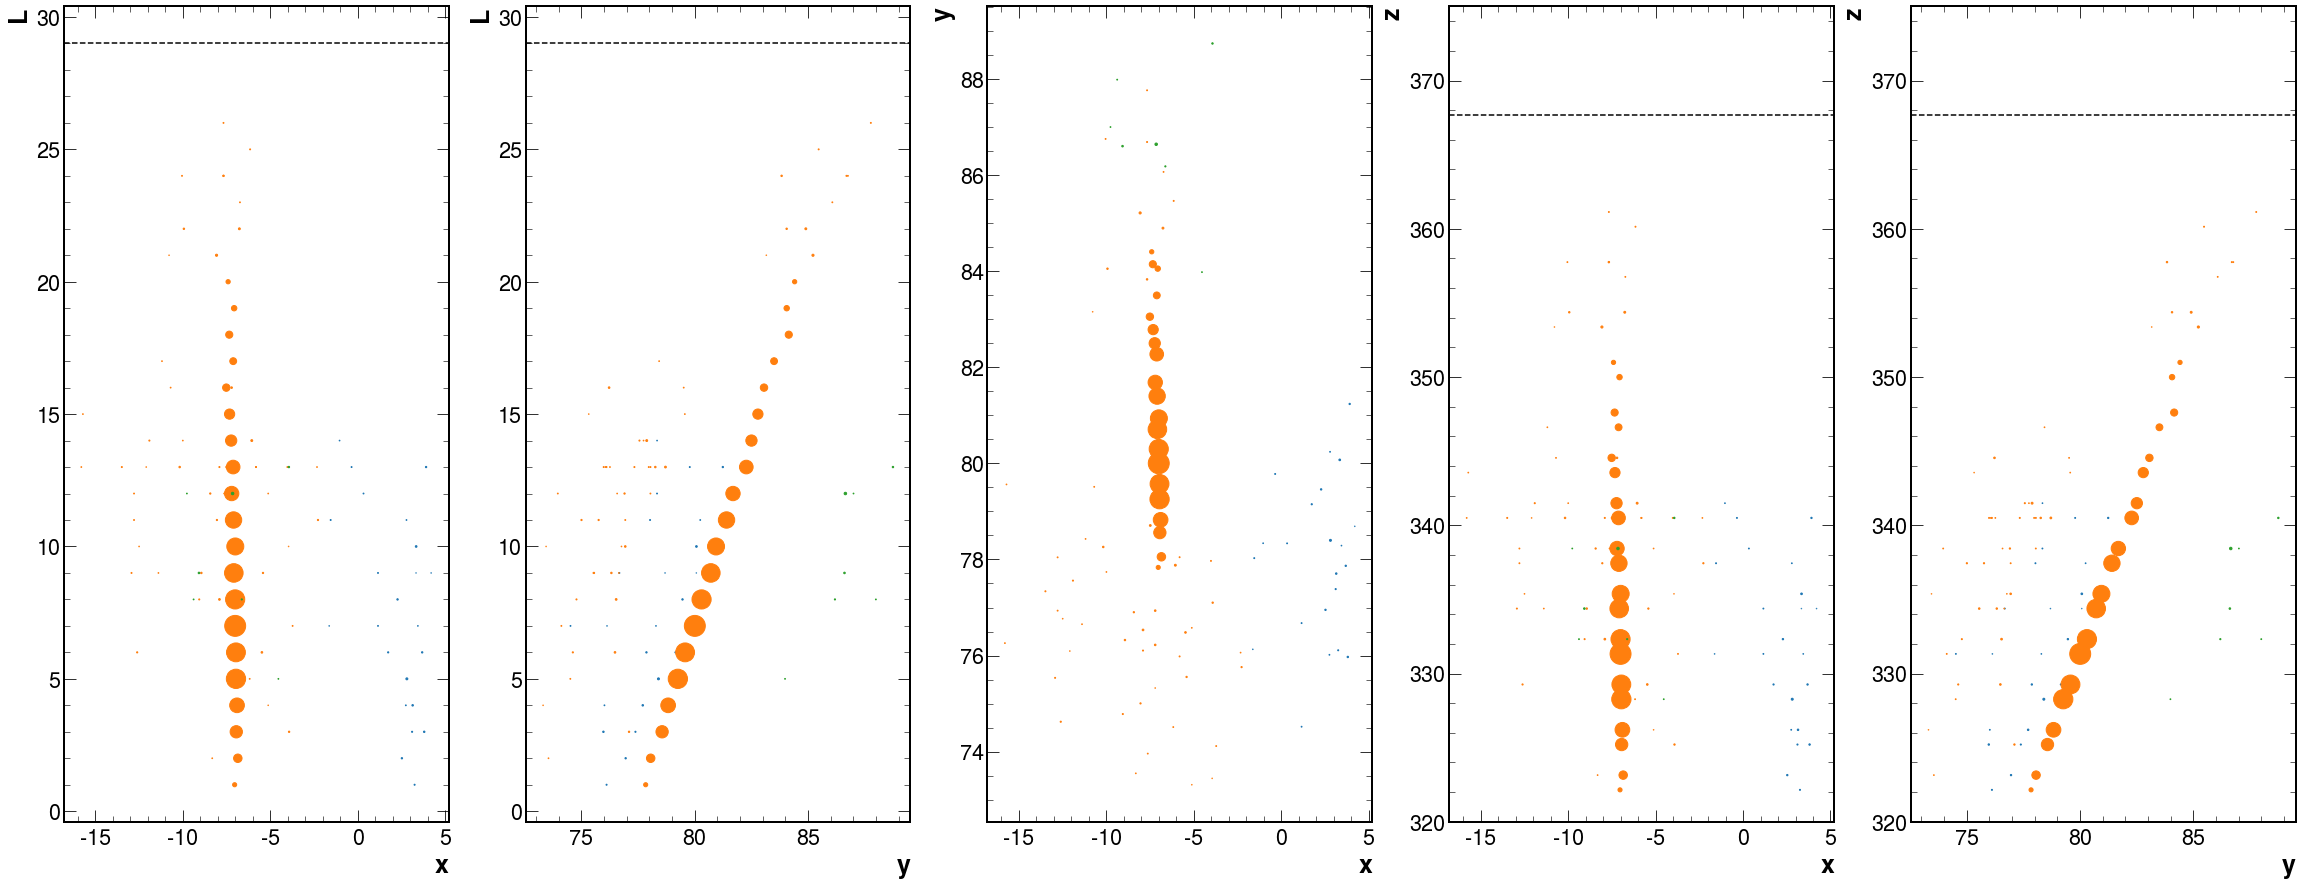

##### ---------------------- forShamik ---------------------- #####


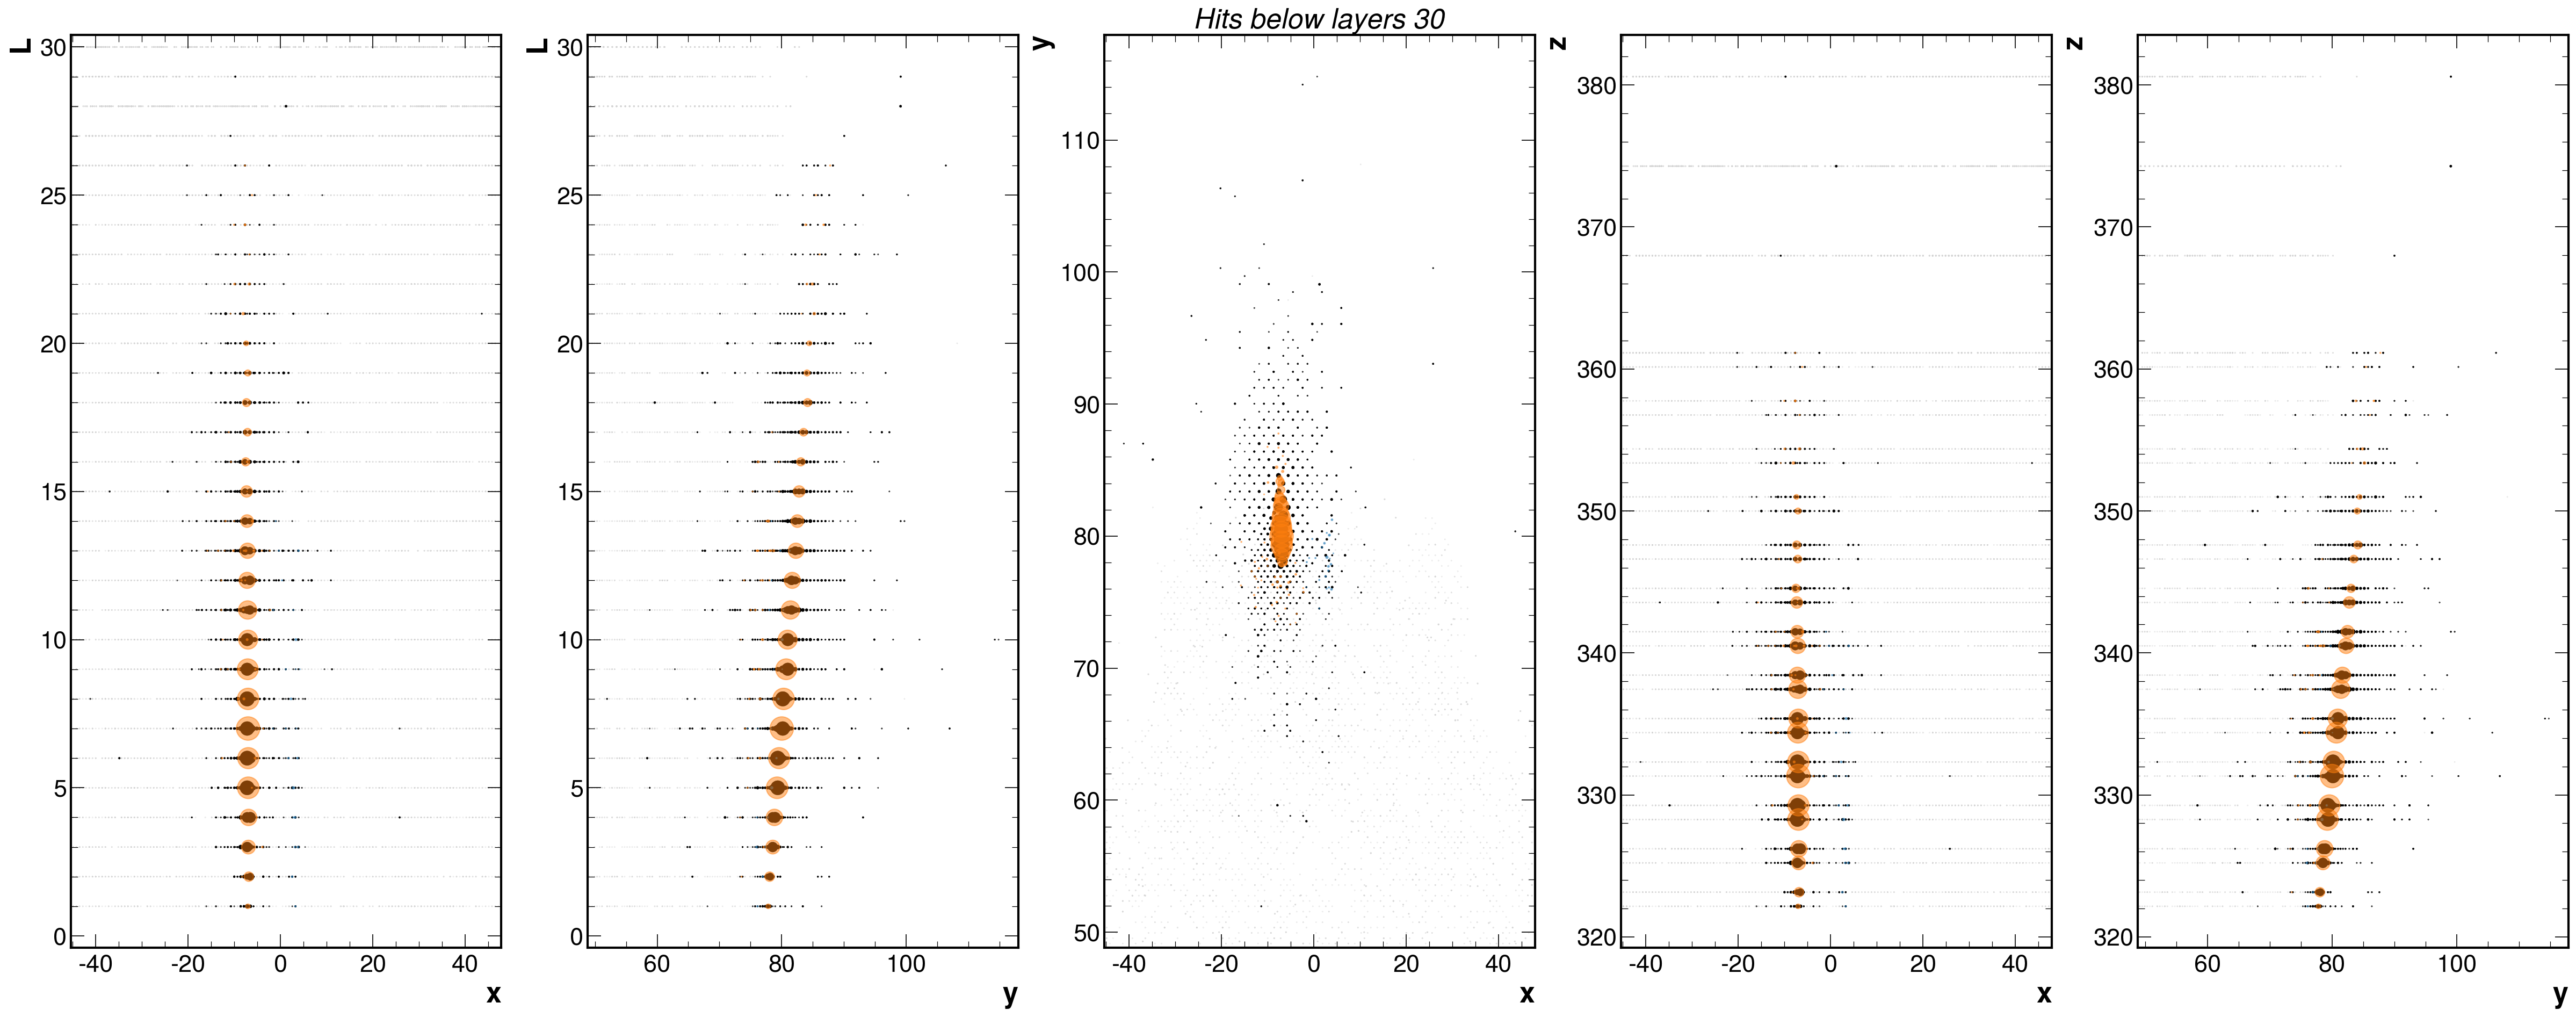

In [244]:
evt = 1

posidx = [] ### for positive z LCs
negidx = [] ### for negative z LCs
for i in range(len(multi_clus2d[evt])): #Loop over number of LCs and check if the eta is positive or negative
    if multi_eta[evt][i] > 0:
        posidx.append(i)
    else:
        negidx.append(i)
        
# Gen-matching for PU environment 
genMatched, genSign = genMatching()
genSign = np.array(genSign)


print('################################### Positive Eta ###################################')
print('gunEta =', gun_eta[evt][0][0])
print('gunPhi =', gun_phi[evt][0][0])
print('gunEn =', gun_en[evt][0][0])
print('Number of tracksters:', len(posidx))
print('Number of gen matched tracksters:', len(genSign[genSign>0]))
print('Number of calo particles:', len(calo_simclusidx[evt][0]))

simidxpos = sim_indices[evt][calo_simclusidx[evt][1]]
simidxpos = np.unique(simidxpos.flatten())
simrechits = np.stack((rechit_x[evt][simidxpos],rechit_y[evt][simidxpos],rechit_z[evt][simidxpos],rechit_layer[evt][simidxpos],rechit_energy[evt][simidxpos]),axis=0)

eventDisplay(clus_x[evt], clus_y[evt], clus_z[evt], clus_l[evt], clus_en[evt],
             rechit_x[evt], rechit_y[evt], rechit_z[evt], rechit_layer[evt], rechit_energy[evt],
             simrechits,
             False, posidx, multi_clus2d[evt], genMatched)


# print('################################### Negative Eta ###################################')
# print('gunEta =', gun_eta[evt][0][1])
# print('gunPhi =', gun_phi[evt][0][1])
# print('gunEn =', gun_en[evt][0][1])
# print('Number of tracksters:', len(negidx))
# print('Number of gen matched tracksters:', len(genSign[genSign<0]))
# print('Number of calo particles:', len(calo_simclusidx[evt][0]))

# simidxpos = sim_indices[evt][calo_simclusidx[evt][0]]
# simidxpos = np.unique(simidxpos.flatten())
# simrechits = np.stack((rechit_x[evt][simidxpos], rechit_y[evt][simidxpos], rechit_z[evt][simidxpos], rechit_layer[evt][simidxpos], rechit_energy[evt][simidxpos]),axis=0)

# eventDisplay(clus_x[evt], clus_y[evt], clus_z[evt], clus_l[evt], clus_en[evt], 
#              rechit_x[evt], rechit_y[evt], rechit_z[evt], rechit_layer[evt], rechit_energy[evt],
#              simrechits,
#              True, negidx, multi_clus2d[evt], genMatched)
